In [521]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [522]:
df  = pd.read_csv("Bitcoin Historical Data2024.csv")

In [523]:
print("Shape of the Dataset:",df.shape)
#the head method displays the first 5 rows of the data
df.head(5)  

Shape of the Dataset: (311, 7)


,Date,Price,Open,High,Low,Vol.,Change %
0,11/06/2024,"75,587.2","69,374.1","76,007.7","69,323.0",340.97K,8.96%
1,11/05/2024,"69,373.7","67,848.3","70,495.6","67,473.6",108.95K,2.25%
2,11/04/2024,"67,848.8","68,770.3","69,483.4","66,834.0",101.31K,-1.34%
3,11/03/2024,"68,769.6","69,334.8","69,383.6","67,514.2",83.16K,-0.80%
4,11/02/2024,"69,325.8","69,499.3","69,896.9","69,029.0",38.72K,-0.26%


In [524]:
df.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [525]:
scrubbed_df = df.copy()
scrubbed_df.dtypes
print("Shape of the Scrubbed:",scrubbed_df.shape)
#the head method displays the first 5 rows of the data
scrubbed_df.head(5)  

Shape of the Scrubbed: (311, 7)


,Date,Price,Open,High,Low,Vol.,Change %
0,11/06/2024,"75,587.2","69,374.1","76,007.7","69,323.0",340.97K,8.96%
1,11/05/2024,"69,373.7","67,848.3","70,495.6","67,473.6",108.95K,2.25%
2,11/04/2024,"67,848.8","68,770.3","69,483.4","66,834.0",101.31K,-1.34%
3,11/03/2024,"68,769.6","69,334.8","69,383.6","67,514.2",83.16K,-0.80%
4,11/02/2024,"69,325.8","69,499.3","69,896.9","69,029.0",38.72K,-0.26%


In [526]:
scrubbed_df["Date"] = pd.to_datetime(scrubbed_df["Date"])
print("Shape of the Scrubbed:",scrubbed_df.shape)
#the head method displays the first 5 rows of the data
scrubbed_df.head(5)  

Shape of the Scrubbed: (311, 7)


,Date,Price,Open,High,Low,Vol.,Change %
0,2024-11-06,"75,587.2","69,374.1","76,007.7","69,323.0",340.97K,8.96%
1,2024-11-05,"69,373.7","67,848.3","70,495.6","67,473.6",108.95K,2.25%
2,2024-11-04,"67,848.8","68,770.3","69,483.4","66,834.0",101.31K,-1.34%
3,2024-11-03,"68,769.6","69,334.8","69,383.6","67,514.2",83.16K,-0.80%
4,2024-11-02,"69,325.8","69,499.3","69,896.9","69,029.0",38.72K,-0.26%


In [527]:
scrubbed_df["YearDay"] = scrubbed_df["Date"].dt.day_of_year
scrubbed_df["MonthDay"] = scrubbed_df["Date"].dt.day
scrubbed_df["WeekDay"] = scrubbed_df["Date"].dt.weekday


#Using the head command to view (only) the data and the newly engineered features
print(scrubbed_df.head())

        Date     Price      Open      High       Low     Vol. Change %  \
0 2024-11-06  75,587.2  69,374.1  76,007.7  69,323.0  340.97K    8.96%   
1 2024-11-05  69,373.7  67,848.3  70,495.6  67,473.6  108.95K    2.25%   
2 2024-11-04  67,848.8  68,770.3  69,483.4  66,834.0  101.31K   -1.34%   
3 2024-11-03  68,769.6  69,334.8  69,383.6  67,514.2   83.16K   -0.80%   
4 2024-11-02  69,325.8  69,499.3  69,896.9  69,029.0   38.72K   -0.26%   

   YearDay  MonthDay  WeekDay  
0      311         6        2  
1      310         5        1  
2      309         4        0  
3      308         3        6  
4      307         2        5  


In [528]:
scrubbed_df["Price"] = scrubbed_df["Price"].str.replace(",","")
scrubbed_df["Open"]  = scrubbed_df["Open"].str.replace(",","")
print(scrubbed_df.head())

        Date    Price     Open      High       Low     Vol. Change %  YearDay  \
0 2024-11-06  75587.2  69374.1  76,007.7  69,323.0  340.97K    8.96%      311   
1 2024-11-05  69373.7  67848.3  70,495.6  67,473.6  108.95K    2.25%      310   
2 2024-11-04  67848.8  68770.3  69,483.4  66,834.0  101.31K   -1.34%      309   
3 2024-11-03  68769.6  69334.8  69,383.6  67,514.2   83.16K   -0.80%      308   
4 2024-11-02  69325.8  69499.3  69,896.9  69,029.0   38.72K   -0.26%      307   

   MonthDay  WeekDay  
0         6        2  
1         5        1  
2         4        0  
3         3        6  
4         2        5  


In [529]:
scrubbed_df["Price"] = pd.to_numeric(scrubbed_df["Price"])
scrubbed_df["Open"] = pd.to_numeric(scrubbed_df["Open"])
scrubbed_df["Mean Price"] = scrubbed_df[["Price","Open"]].mean(axis=1)
print(scrubbed_df.head())

        Date    Price     Open      High       Low     Vol. Change %  YearDay  \
0 2024-11-06  75587.2  69374.1  76,007.7  69,323.0  340.97K    8.96%      311   
1 2024-11-05  69373.7  67848.3  70,495.6  67,473.6  108.95K    2.25%      310   
2 2024-11-04  67848.8  68770.3  69,483.4  66,834.0  101.31K   -1.34%      309   
3 2024-11-03  68769.6  69334.8  69,383.6  67,514.2   83.16K   -0.80%      308   
4 2024-11-02  69325.8  69499.3  69,896.9  69,029.0   38.72K   -0.26%      307   

   MonthDay  WeekDay  Mean Price  
0         6        2    72480.65  
1         5        1    68611.00  
2         4        0    68309.55  
3         3        6    69052.20  
4         2        5    69412.55  


In [530]:
scrubbed_df.drop(["Date","Price","Open","High","Low","Vol.","Change %"],axis=1,inplace=True)
print(scrubbed_df.head())

   YearDay  MonthDay  WeekDay  Mean Price
0      311         6        2    72480.65
1      310         5        1    68611.00
2      309         4        0    68309.55
3      308         3        6    69052.20
4      307         2        5    69412.55


In [531]:
scrubbed_df.set_index('YearDay', inplace=True)
scrubbed_df.sort_index(inplace=True)
# scrubbed_df.sort_values(by=['YearDay'],ascending=False,inplace=True)
print(scrubbed_df.head(100))

         MonthDay  WeekDay  Mean Price
YearDay                               
1               1        0    43227.95
2               2        1    44563.30
3               3        2    43889.90
4               4        3    43496.55
5               5        4    44159.95
...           ...      ...         ...
96              5        4    68164.65
97              6        5    68360.55
98              7        6    69128.85
99              8        0    70494.05
100             9        1    70387.65

[100 rows x 3 columns]


In [532]:
x = scrubbed_df[["MonthDay","WeekDay"]]
y = scrubbed_df[['Mean Price']]

In [533]:
x.head()
# x.shape
x.dtypes

MonthDay    int32
WeekDay     int32
dtype: object

In [534]:
y.head()
# y.shape
y.dtypes

Mean Price    float64
dtype: object

In [535]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 3)

In [536]:
tss.get_n_splits

<bound method _BaseKFold.get_n_splits of TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)>

In [537]:
for train_index, test_index in tss.split(x):
    x_train, x_test = x.iloc[train_index, :], x.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [538]:
x_train.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       225, 226, 227, 228, 229, 230, 231, 232, 233, 234],
      dtype='int32', name='YearDay', length=234)

In [539]:
x_test.index

Index([235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
       249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262,
       263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276,
       277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290,
       291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304,
       305, 306, 307, 308, 309, 310, 311],
      dtype='int32', name='YearDay')

<Axes: xlabel='YearDay'>

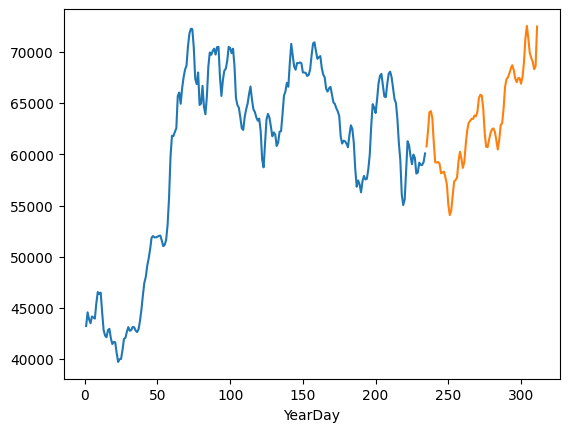

In [540]:
def price2num(x):
    if type(x) == str: 
        x = x.strip('$').replace(',', '')
    return float(x)#function to convert price from string to floats
y_train_val=y_train["Mean Price"].apply(price2num)
y_train_val.groupby('YearDay').mean().plot()
y_test_val=y_test["Mean Price"].apply(price2num)
y_test_val.groupby('YearDay').mean().plot()

In [541]:
scrubbed_df.dtypes

MonthDay        int32
WeekDay         int32
Mean Price    float64
dtype: object

In [542]:
x_train.shape

(234, 2)

In [543]:
y_train.shape

(234, 1)

In [544]:
# #Create train and test dataset with an 80:20 split
# x_train, x_test, y_train, y_test = train_test_split(scrubbed_df[["Month","Quarter","Day","WeekDay"]],scrubbed_df[["Mean Price"]],test_size=0.2,random_state=2018)
# #Further divide training dataset into train and validation dataset with an 90:10 split
# x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=2018)

#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
# print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
# print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (234, 2)
Shape of x_test: (77, 2)
Shape of y_train: (234, 1)
Shape of y_test: (77, 1)


In [545]:
x_train.head()


,MonthDay,WeekDay
YearDay,,
1,1,0
2,2,1
3,3,2
4,4,3
5,5,4


In [546]:
y_train.head()

,Mean Price
YearDay,
1,43227.95
2,44563.30
3,43889.90
4,43496.55
5,44159.95


In [550]:
#Create Deep Neural Network Architecture
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(350,input_dim = 2,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))

model.add(Dense(1,activation = "linear"))

#Configure the model
model.compile(optimizer='adam', loss="mean_absolute_error", 
metrics=["mean_absolute_error"])

#Train the model
model.fit(x_train,y_train,epochs=15,batch_size=10)

C:\Users\Clone\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 53453.6680 - mean_absolute_error: 53453.6680
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 25037.1152 - mean_absolute_error: 25037.1152
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 26243.1074 - mean_absolute_error: 26243.1074
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20744.7266 - mean_absolute_error: 20744.7266
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30635.6895 - mean_absolute_error: 30635.6895
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 26610.9316 - mean_absolute_error: 26610.9316
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 18764.2910 - mean_absolute_error: 18764.2910
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 18129.3574 - mean_absolute_error: 18129.3574
Epoch 9/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23087.8145 - mean_absolute_error: 23087.8125
Epoch 10/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1577

In [551]:
#Manually predicting from the model, instead of using model's evaluate function
y_test["Prediction"] = model.predict(x_test)
# y_test.columns = ["Actual Price","Predicted Price"]
print(y_test.head(10))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
         Mean Price    Prediction
YearDay                          
235        60765.25  52505.890625
236        62213.90  54211.722656
237        64110.50  57991.484375
238        64216.95  63190.054688
239        63543.45  62459.738281
240        61141.55  62209.738281
241        59220.80  62508.464844
242        59200.40  62997.445312
243        59245.70  64093.992188
244        59049.50  65674.007812


C:\Users\Clone\AppData\Local\Temp\ipykernel_2692\195181267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["Prediction"] = model.predict(x_test)


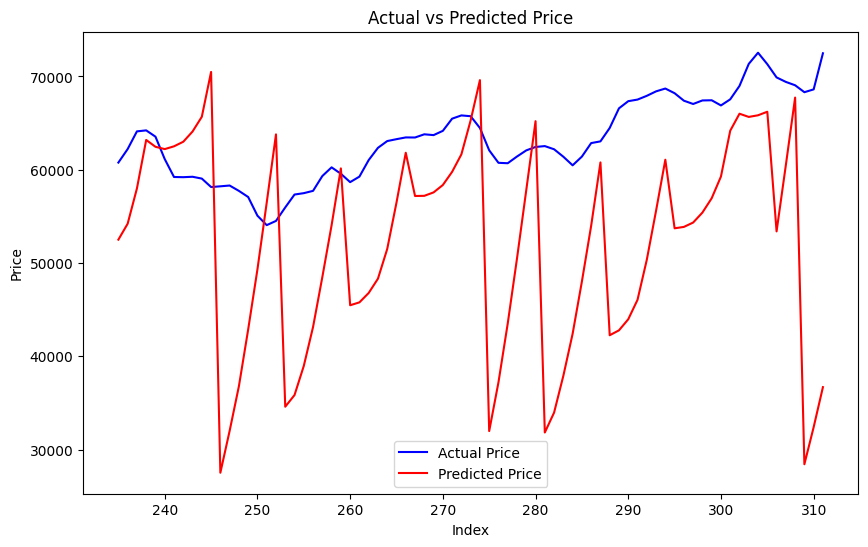

In [552]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test['Mean Price'], label='Actual Price', color='blue')
plt.plot(y_test.index, y_test['Prediction'], label='Predicted Price', color='red')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()


In [313]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(x_test,y_test)

#Print the results
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30987.0156 - mean_absolute_error: 30987.0176 
Metric  loss : 31611.58
Metric  compile_metrics : 31611.58
